<a href="https://colab.research.google.com/github/tgubbe/Spotify_YouTube_EDA/blob/main/Spotify_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Spotify & YouTube Songs**


## **Introduction**

In this notebook, I will perform exploratory data analysis (EDA) to find trends in the data between Spotify and YouTube songs. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


The data is loaded into a data frame and viewed.

In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Datasets/Spotify_Youtube.csv')

In [4]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


## **Viewing the Data and Using Value Counts**

After loading the data and getting a basic view of the data table, a few adjustments and basic calculations can be performed. There are a couple of columns that will be irrelevant for performing EDA. These columns are removed from the data frame.

In [5]:
df = df.drop(['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Description'], axis=1)

After removing a few columns, the info and sum commands are used to view the data types and the amount of null values. In addition, the duplicated function is run to see if there are any duplicates in the data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Title             20248 non-null  object 
 16  Channel           20248 non-null  object

In [7]:
df.isnull().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64

In [8]:
df.duplicated().sum()

0

Most of the missing values seem to be from the YouTube data. This is something to keep in mind when completing the EDA.

A basic form of exploratory data analysis is using value counts to see how the data is distributed. The value counts function is used to see the value counts for artists and album type.

In [9]:
df['Artist'].value_counts()

Gorillaz                  10
Die drei !!!              10
Hollywood Undead          10
Empire of the Sun         10
White Noise for Babies    10
                          ..
NewJeans                   6
Alfonso Herrera            6
Jimin                      3
Stars Music Chile          1
Bootie Brown               1
Name: Artist, Length: 2079, dtype: int64

In [10]:
df['Album_type'].value_counts()

album          14926
single          5004
compilation      788
Name: Album_type, dtype: int64

Another effective method for viewing value counts is a pie chart, which is optimal for categories with 6 or fewer variables. In this case, a pie chart can be used for album type.

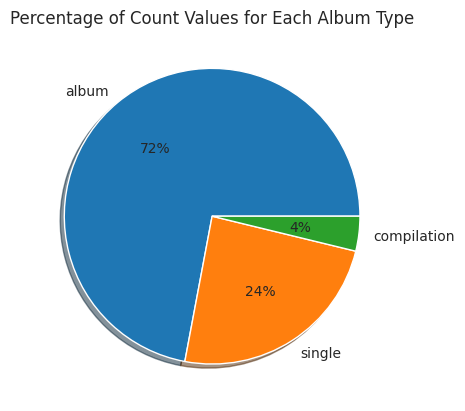

In [11]:
sum_album_type = df['Album_type'].value_counts()
#Adds color to pie chart
colors = sns.color_palette()[0:3]
#Plots pie chart
plt.pie(sum_album_type.values, labels = sum_album_type.index, colors = colors, autopct = '%.0f%%', shadow = True)
plt.title('Percentage of Count Values for Each Album Type')
#Edit font size
plt.rcParams['font.size'] = 12

From the pie chart, the majority of the songs are from albums, followed by singles and compilations.

## **Bar Charts**

Bar charts are an effective method to view the distribution of the data or, in this case, the top values of a category and their proportion to one another.

First, a bar chart is created to view the artists with the top 10 amount of views on YouTube.

<ipython-input-12-7fa309907b77>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  artist_views = df.groupby('Artist', as_index = False).sum().sort_values(by = 'Views', ascending = False)


Text(0.5, 0, 'Total Views (Billions)')

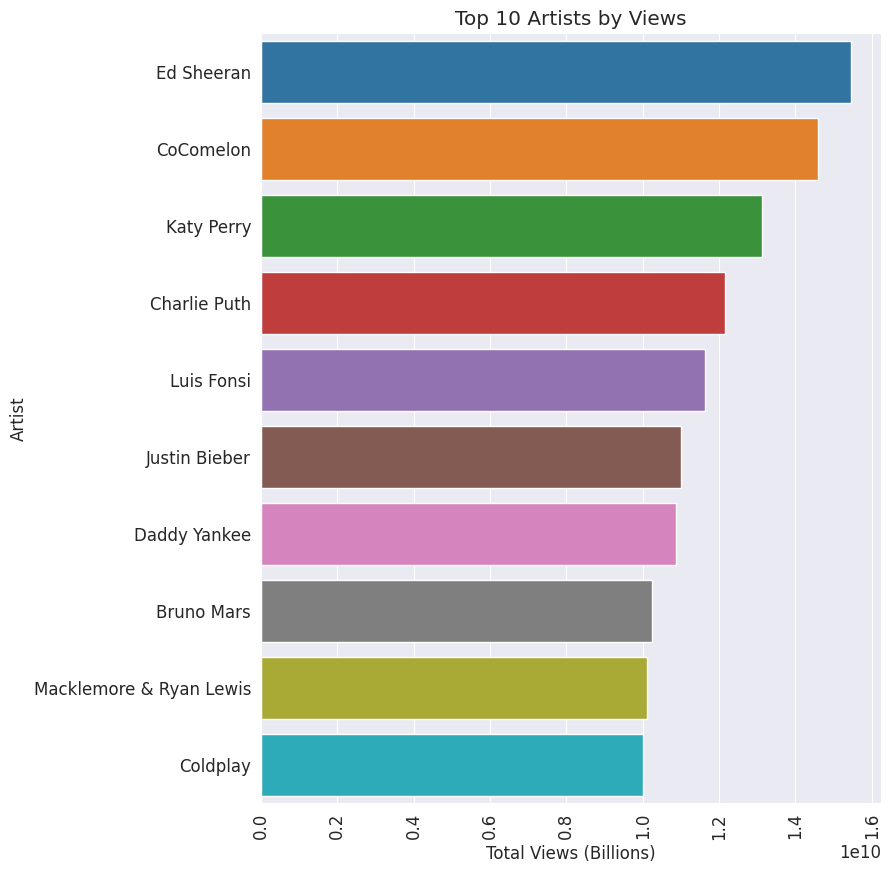

In [12]:
#Group in descending order of total views by artist.
artist_views = df.groupby('Artist', as_index = False).sum().sort_values(by = 'Views', ascending = False)
fig, ax = plt.subplots(figsize = (8,10))
#Create barplot of top 10 artists by views.
sns.barplot(x = artist_views['Views'][:10], y = artist_views['Artist'][:10])
plt.xticks(rotation = 90)
ax.set_title('Top 10 Artists by Views')
ax.set_xlabel('Total Views (Billions)')

A bar chart can also be created to see the top 10 songs by total views on YouTube.

<ipython-input-13-7e6ef43d4d63>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  song_views = df.groupby('Track', as_index = False).sum().sort_values(by = 'Views', ascending = False)


Text(0.5, 0, 'Total Views (Billions)')

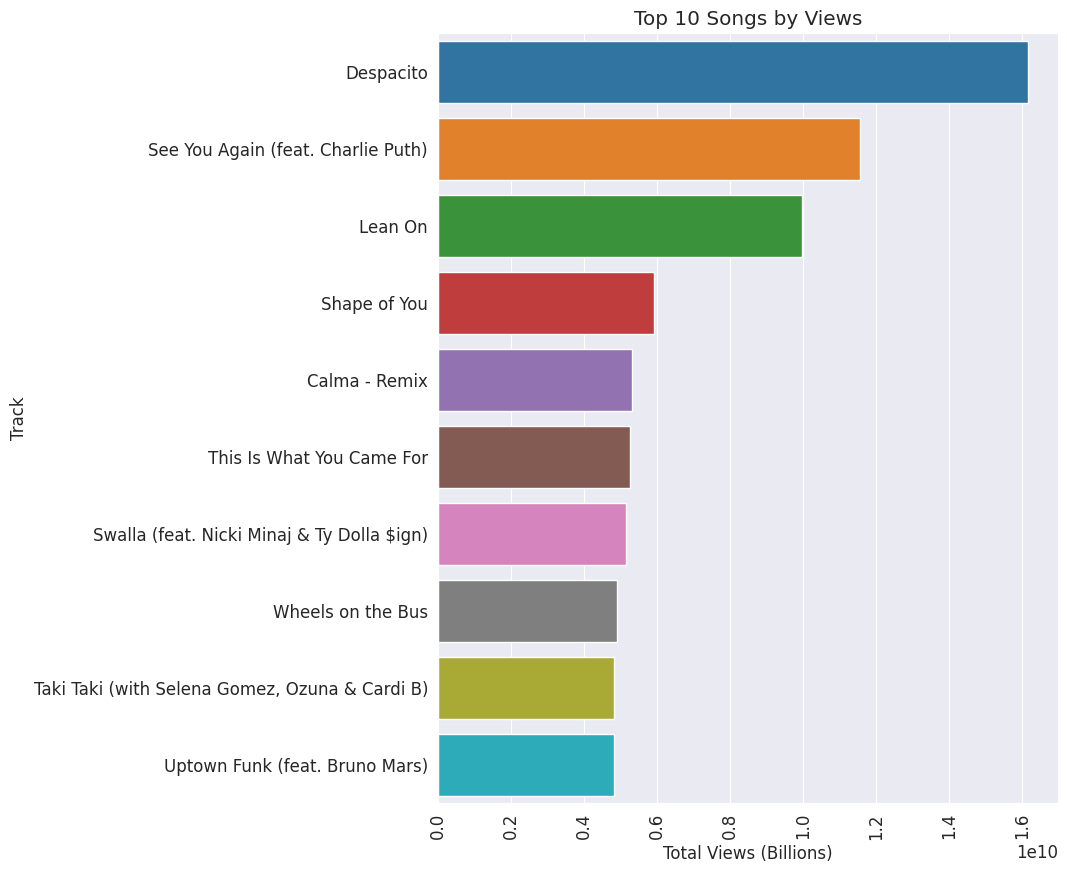

In [13]:
#Group in descending order of total views by song.
song_views = df.groupby('Track', as_index = False).sum().sort_values(by = 'Views', ascending = False)
fig, ax = plt.subplots(figsize = (8,10))
#Create barplot of top 10 artists by views.
sns.barplot(x = song_views['Views'][:10], y = song_views['Track'][:10])
plt.xticks(rotation = 90)
ax.set_title('Top 10 Songs by Views')
ax.set_xlabel('Total Views (Billions)')

Next, a bar chart is created to display the top 10 artists based on the amount of likes on YouTube.

<ipython-input-14-b5f6204b299c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  artist_likes = df.groupby('Artist', as_index = False).sum().sort_values(by = 'Likes', ascending = False)


Text(0.5, 0, 'Total Likes (Billions)')

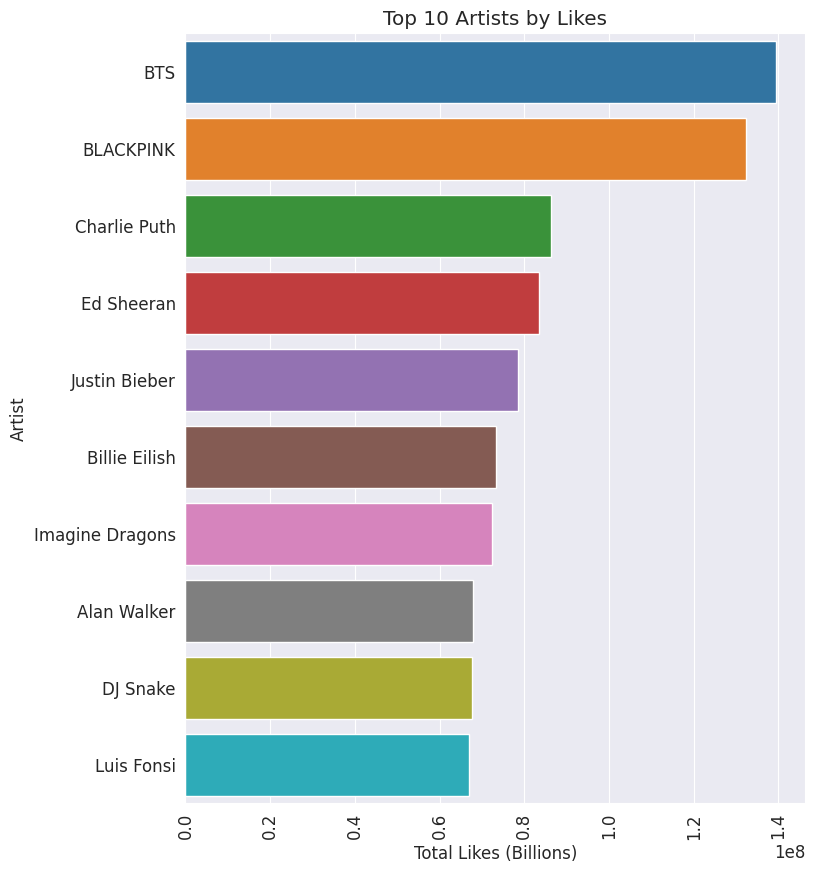

In [14]:
#Group in descending order of total likes by artists.
artist_likes = df.groupby('Artist', as_index = False).sum().sort_values(by = 'Likes', ascending = False)
fig, ax = plt.subplots(figsize = (8,10))
#Create barplot of top 10 artists by likes.
sns.barplot(x = artist_likes['Likes'][:10], y = artist_likes['Artist'][:10])
plt.xticks(rotation = 90)
ax.set_title('Top 10 Artists by Likes')
ax.set_xlabel('Total Likes (Billions)')

Bar charts can help see trends and pattern in the data. For example, the bar charts above illustrate the popularity of artists such as Ed Sheeran and Charlie Puth, as both artists are in all 3 categories (Shape of You is a song by Ed Sheeran, while Charlie Puth is featured in the song See You Again).

A bar chart can also be created to see an individual artist's top songs. Below is an example of displaying the top 5 songs by Charlie Puth.

<ipython-input-15-f8cda11e27a9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  puth_df = df.groupby(['Artist', 'Track'], as_index = False).sum()


Text(0.5, 0, 'Total Views (Billions)')

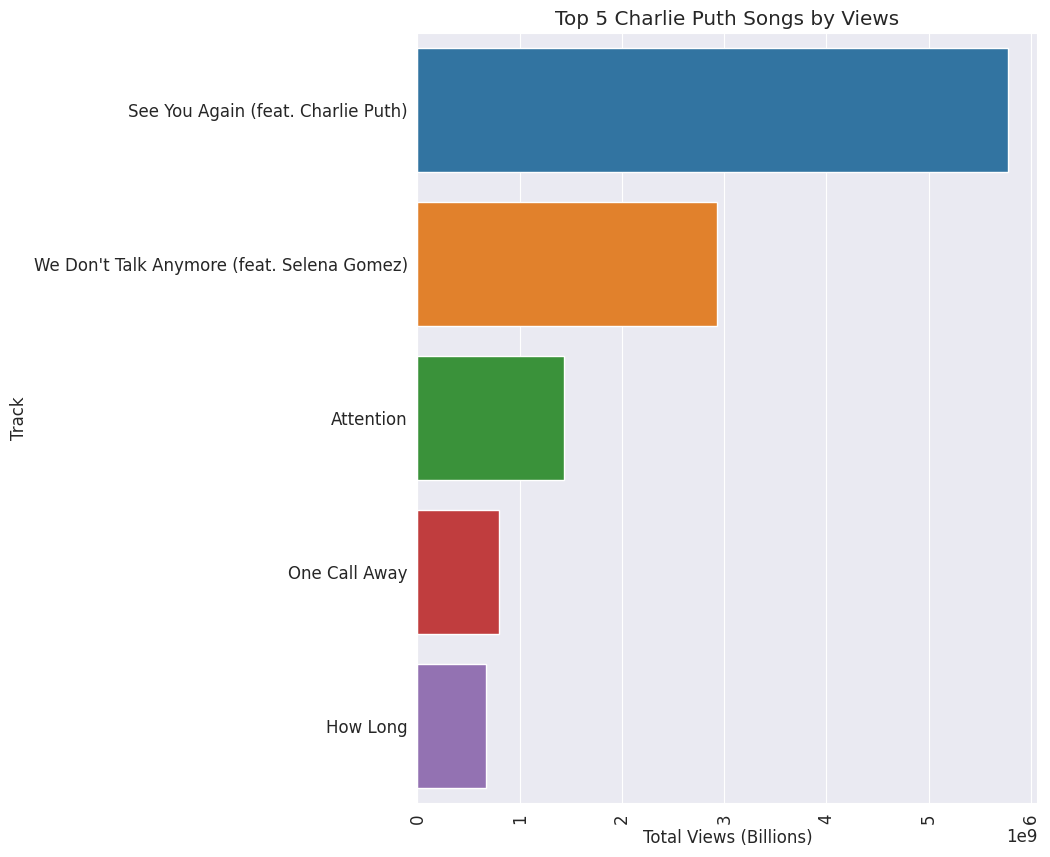

In [15]:
#Group in descending order of total views by artist and track.
puth_df = df.groupby(['Artist', 'Track'], as_index = False).sum()
#Sort values by the total views with Charlie Puth as the artist. 
puth_views = puth_df[puth_df['Artist'] == 'Charlie Puth'].sort_values(by = 'Views', ascending = False)
#Create barplot of top 5 Charlie Puth songs by the total amount of views on YouTube.
fig, ax = plt.subplots(figsize = (8,10))
sns.barplot(x = puth_views['Views'][:5], y = puth_views['Track'][:5])
plt.xticks(rotation = 90)
ax.set_title('Top 5 Charlie Puth Songs by Views')
ax.set_xlabel('Total Views (Billions)')

As seen above, bar charts help give a visual representation of the data's proportionality and distribution. Bar charts are easy to create and easy to interpret, making them a go=to tool in exploratory data analysis.

## **Comparison of Multiple Categories**

Next, it's possible to compare multiple categories in a bar chart. This is useful in seeing the commonalities among popular songs.

Before creating a multi-category bar chart, a correlation heat map is designed to see which categories to compare.

<ipython-input-16-061afa684cc2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr().round(2),annot = True, cmap = "coolwarm")


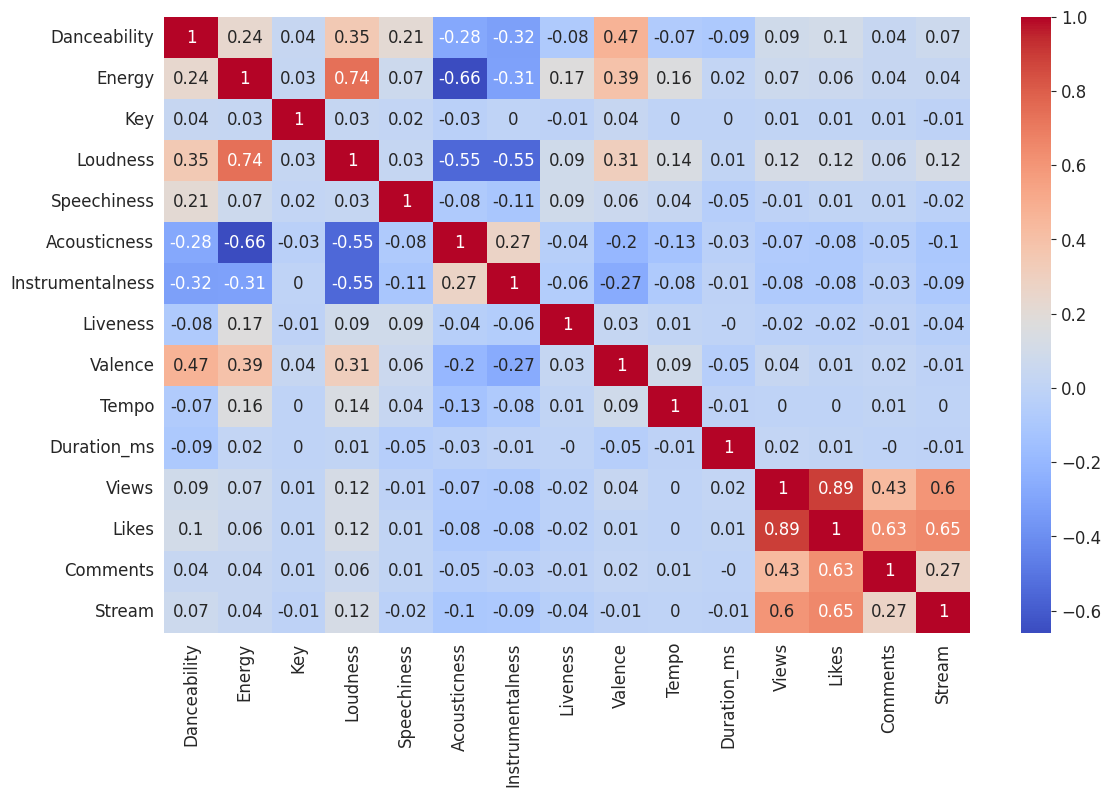

In [16]:
fig,ax=plt.subplots(figsize = (13, 8))
sns.heatmap(data = df.corr().round(2),annot = True, cmap = "coolwarm")
plt.show()

The correlation heat map only considers variables with numerical values, so some variables will be excluded, such as 'Artist' and 'Album'.

From the correlation heat map, there appears to be a correlation between views, likes, comments, and stream.

Since I want to compare the makeup of songs, a new table is created to compare views, energy, valence, danceability, and loudness of songs. The data is sorted by the top 10 artists by views on YouTube.

In [17]:
top_artists = df.sort_values('Views', ascending =False).head(10)
top_artists[['Artist', 'Views', 'Energy', 'Valence', 'Danceability', 'Loudness']]

,Artist,Views,Energy,Valence,Danceability,Loudness
1147,Luis Fonsi,8.079649e+09,0.797,0.839,0.655,-4.787
365,Daddy Yankee,8.079647e+09,0.797,0.839,0.655,-4.787
12452,Ed Sheeran,5.908398e+09,0.652,0.931,0.825,-3.183
14580,Charlie Puth,5.773798e+09,0.481,0.283,0.689,-7.503
12469,Wiz Khalifa,5.773797e+09,0.481,0.283,0.689,-7.503
20303,CoComelon,4.898831e+09,0.387,0.965,0.941,-11.920
10686,Mark Ronson,4.821016e+09,0.609,0.928,0.856,-7.223
8937,PSY,4.679767e+09,0.937,0.749,0.727,-2.871
9569,Maroon 5,3.817733e+09,0.788,0.884,0.748,-7.055
13032,Katy Perry,3.725749e+09,0.771,0.436,0.671,-4.821


Now that the new table is created, the multi-category bar chart is created. This is also known as a category plot, since continuous numeric variables are on one axis and a non-numeric variable is on another axis. 

Since the loudness variable is a negative value, I stuck with using energy, valence, and danceability for the plot.

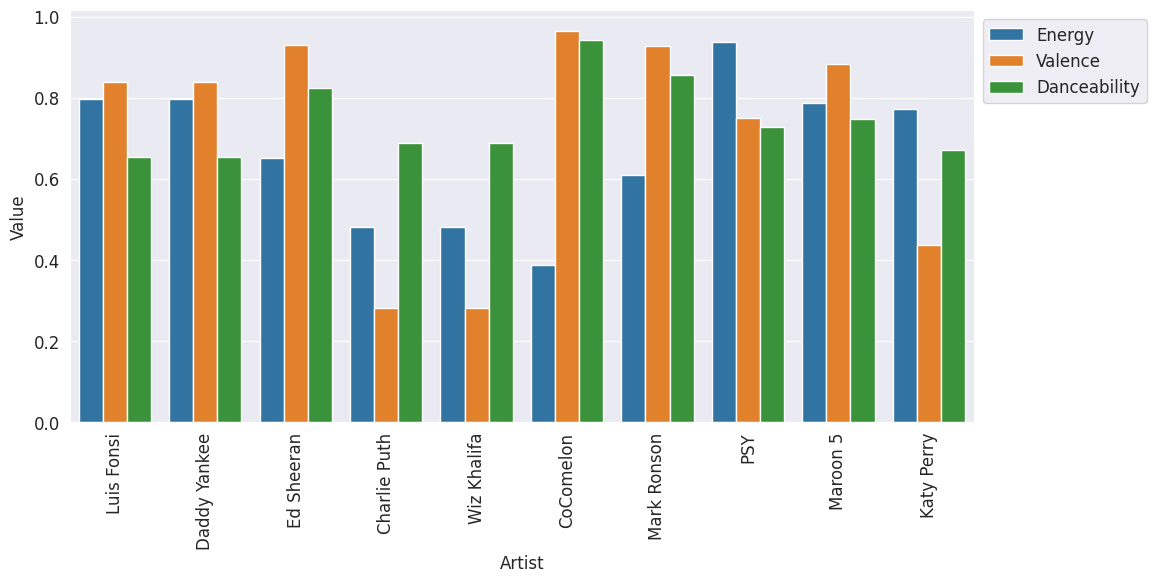

In [18]:
top_categories = top_artists.melt(id_vars = 'Artist', value_vars = ['Energy', 'Valence', 'Danceability'], var_name = 'Variables' , value_name = 'Value')
sns.catplot(x = 'Artist', y = 'Value', hue = 'Variables', data = top_categories, kind = 'bar', legend = False, height = 5, aspect = 2)
ax.set_xlabel('Artist')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.20,1))

From the chart, it appears the top artists have a high value in two of the three categories. For example, Luis Fonsi has high energy and valence, while Kay Perry has high energy and danceability.

The same chart is created for the top 10 artists by Spotify streams.

In [19]:
top_artists_stream = df.sort_values('Stream', ascending =False).head(10)
top_artists_stream[['Artist', 'Stream', 'Energy', 'Valence', 'Danceability', 'Loudness']]

,Artist,Stream,Energy,Valence,Danceability,Loudness
15250,The Weeknd,3.386520e+09,0.730,0.334,0.514,-5.934
12452,Ed Sheeran,3.362005e+09,0.652,0.931,0.825,-3.183
19186,Lewis Capaldi,2.634013e+09,0.405,0.446,0.501,-5.679
17937,Post Malone,2.594927e+09,0.520,0.129,0.585,-6.136
17445,Swae Lee,2.538330e+09,0.522,0.925,0.755,-4.368
17938,Post Malone,2.538330e+09,0.522,0.925,0.755,-4.368
13503,Drake,2.522432e+09,0.625,0.370,0.792,-5.609
16099,The Chainsmokers,2.456205e+09,0.524,0.661,0.748,-5.599
16028,Halsey,2.456205e+09,0.524,0.661,0.748,-5.599
14030,Imagine Dragons,2.369272e+09,0.780,0.666,0.776,-4.374


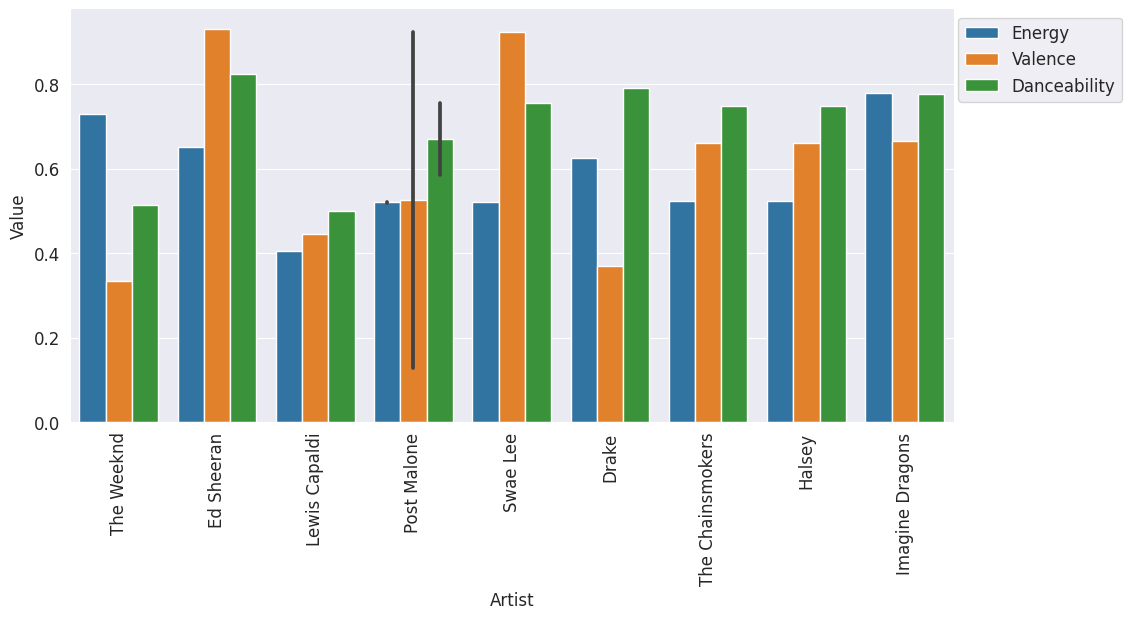

In [20]:
top_categories_stream = top_artists_stream.melt(id_vars = 'Artist', value_vars = ['Energy', 'Valence', 'Danceability'], var_name = 'Variables' , value_name = 'Value')
sns.catplot(x = 'Artist', y = 'Value', hue = 'Variables', data = top_categories_stream, kind = 'bar', legend = False, height = 5, aspect = 2)
ax.set_xlabel('Artist')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.20,1))

The artists are different from the YouTube chart above, but the same conclusion applies: it appears the top artists have a high value in two of the three categories.

The plot for Post Malone appears to be inaccurate, with the black lines dictating where the graph values should be. I'm not sure why this occurs. If you know why, please comment!

## **Conclusion**

This session was a short exploratory data analysis of Spotify and YouTube data. From the data, bar charts were created to see artists and songs, as well as the top songs for a specific artist. In addition, bar charts were created to compare the energy, valence, and danceability of the top 10 artists by YouTube views and Spotify streams.

Thank you for viewing my session!